2. Test using Shapiro-Wilk normality test the Ethereum returns for trading data every five minutes, from August 7, 2015 to April 15, 2025.


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Load first dataset (2015 to 2020)
file_path_1 = r"C:\Users\CONSUELO B. MERCADO\Downloads\sa2\ETHUSDT_2015_to_2020.csv"
df1 = pd.read_csv(file_path_1)
df1.rename(columns={'Date': 'date', 'Close': 'close'}, inplace=True)
df1['date'] = pd.to_datetime(df1['date'])

# Load second dataset (2020 to 2025)
file_path_2 = r"C:\Users\CONSUELO B. MERCADO\Downloads\sa2\ETHUSDT_2020_to_2025.csv"
df2 = pd.read_csv(file_path_2)
df2.rename(columns={'date': 'date', 'close': 'close'}, inplace=True)  # just for clarity
df2['date'] = pd.to_datetime(df2['date'])

# Combine datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Sort by date
combined_df = combined_df.sort_values('date')

# Set 'date' as index
combined_df.set_index('date', inplace=True)

# Calculate log returns
combined_df['log_return'] = np.log(combined_df['close'] / combined_df['close'].shift(1))
eth_returns = combined_df['log_return'].dropna()

# Sample 5000 returns for the Shapiro-Wilk test (or less if not enough data)
sample_size = min(5000, len(eth_returns))
sample_returns = eth_returns.sample(n=sample_size, random_state=42)

# Perform Shapiro-Wilk normality test
statistic, p_value = shapiro(sample_returns)

# Print results
print("📊 Shapiro-Wilk Normality Test on ETH/USDT 2015-2025 5-min Returns")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("✅ Returns appear normally distributed (fail to reject H₀).")
else:
    print("❌ Returns are not normally distributed (reject H₀).")


📊 Shapiro-Wilk Normality Test on ETH/USDT 2015-2025 5-min Returns
Test Statistic: 0.5958860022712331
P-value: 1.2980180286413712e-75
❌ Returns are not normally distributed (reject H₀).


Plotting Histogram:

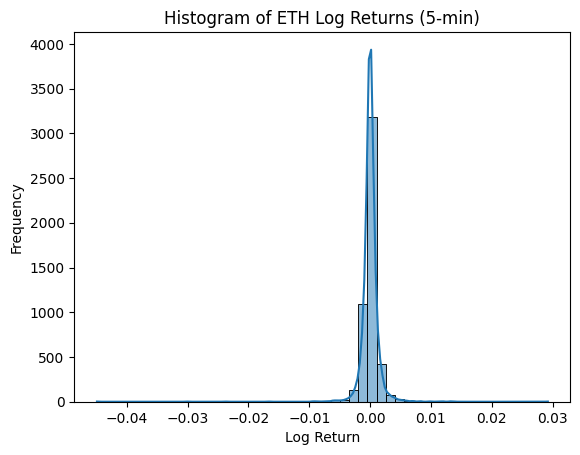

In [10]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(sample_returns, kde=True, bins=50)
plt.title("Histogram of ETH Log Returns (5-min)")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()
